# Gibbs Sampler 

In [2]:
import numpy as np
import scipy as sc
from scipy.stats import invgamma,invwishart, norm,multivariate_normal
import matplotlib.pyplot as plt

In [251]:
data=pd.read_excel("29.08.2022.xlsx")[0:5000] #Leemos los datos y escogemos un rango porque el numero de datos es muy grande.
len(data)

5000

In [252]:
data

,Time [ms],"Signal 1 Wavelength, vac. [nm]"
0,20,852.35622
1,40,852.35622
2,60,852.35622
3,80,852.35622
4,100,852.35622
...,...,...
4995,100150,852.35625
4996,100169,852.35625
4997,100190,852.35625
4998,100210,852.35625


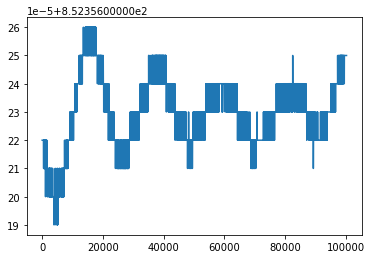

In [253]:
llaves=data.keys()
x=(data[llaves[0]])
y=(data[llaves[1]])
plt.plot(x,y) # Mostramos un imagen de como se ve la señal de estabilidad de un láser.

In [254]:
def distribucion_normal(data:list,var:float):
        dist=np.random.normal(loc=np.mean(data),scale=var/len(data))
        return dist
def distribucion_inversa_gamma(data:list,mean:float):
        gamma=invgamma.rvs(a=len(data)/2,scale=sum((data-mean)**2)/2) 
        return gamma

In [255]:
mean=0.0
var=0.0
n=2000
for i in range(n):
    var=distribucion_inversa_gamma(y,mean)
    mean=distribucion_normal(y,var)
    var=np.sqrt(var)
    

In [256]:
mean,var

(852.356229664024, 1.2680256100345145e-05)

In [257]:
np.mean(y),np.std(y)

(852.356229664024, 1.2595519202465037e-05)

(array([   342.85714372,      0.        ,      0.        ,      0.        ,
         16714.28575649,      0.        ,      0.        ,      0.        ,
         25114.28577769,      0.        ,      0.        ,      0.        ,
        111514.28599583,      0.        ,      0.        ,      0.        ,
             0.        , 126514.2860337 ,      0.        ,      0.        ,
             0.        , 104228.57169172,      0.        ,      0.        ,
             0.        ,  37800.00009544,      0.        ,      0.        ,
             0.        ,   6342.85715887]),
 array([852.35619   , 852.35619233, 852.35619467, 852.356197  ,
        852.35619933, 852.35620167, 852.356204  , 852.35620633,
        852.35620867, 852.356211  , 852.35621333, 852.35621567,
        852.356218  , 852.35622033, 852.35622267, 852.356225  ,
        852.35622733, 852.35622967, 852.356232  , 852.35623433,
        852.35623667, 852.356239  , 852.35624133, 852.35624367,
        852.356246  , 852.35624833, 852.

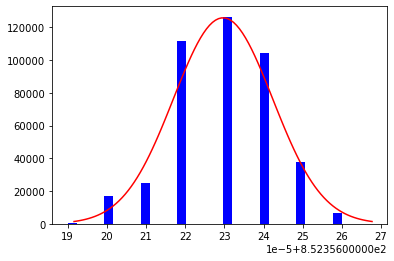

In [264]:
xx = np.linspace(mean-3*var,mean+3*var,100)
yy = norm.pdf(xx, loc=mean, scale=var)
plt.plot(xx, yy*4,color="red",label="Estimado")
plt.hist(y,color='blue',density=True,bins=30,label="Datos" )